In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Fact_Table_With_Corrected_Limits.csv', delimiter=',')


In [2]:
# List of parameters to include in the describe function
parameters = [
    "Escherichia coli", "koliformní bakterie", "intestinální enterokoky", "počty kolonií při 22 °C", 
    "počty kolonií při 36 °C", "MO - živé organismy", "antimon", "arsen", "chrom", "kadmium", 
    "měď", "nikl", "olovo", "rtuť", "selen", "dusičnany", "dusitany", "fluoridy", "kyanidy celkové", 
    "mangan", "bromičnany", "bromoform", "beryllium", "chloridy", "konduktivita", "pH", "sodík", 
    "sírany", "barva", "zákal", "železo", "CHSK-Mn", "vápník", "hořčík", "vápník a hořčík", 
    "bromičnany", "hliník", "amonné ionty", "1,2-dichlorethan", "trichlorethen", "tetrachlorethen", 
    "benzen", "benzo(a)pyren", "acetochlor ESA", "železo", "mangan"
]

# Initialize an empty DataFrame to store results
all_parameters_description_updated = pd.DataFrame()

# Loop through each parameter and compute descriptive statistics
for param in parameters:
    param_data = data[data['Parametr'] == param]
    if not param_data.empty:
        description = param_data['Hodnota'].describe().to_frame().T
        description.index = [param]
        all_parameters_description_updated = pd.concat([all_parameters_description_updated, description])

# Round all numeric values in the table to reasonable precision
all_parameters_description_rounded = all_parameters_description_updated.round({
    'count': 0,   # No decimal places for count
    'mean': 2,    # Two decimal places for mean
    'std': 2,     # Two decimal places for standard deviation
    'min': 2,     # Two decimal places for min
    '25%': 2,     # Two decimal places for 25th percentile
    '50%': 2,     # Two decimal places for median
    '75%': 2,     # Two decimal places for 75th percentile
    'max': 2      # Two decimal places for max
})
all_parameters_description_rounded.to_csv("Statistika_pro_parametry.csv", index=True)

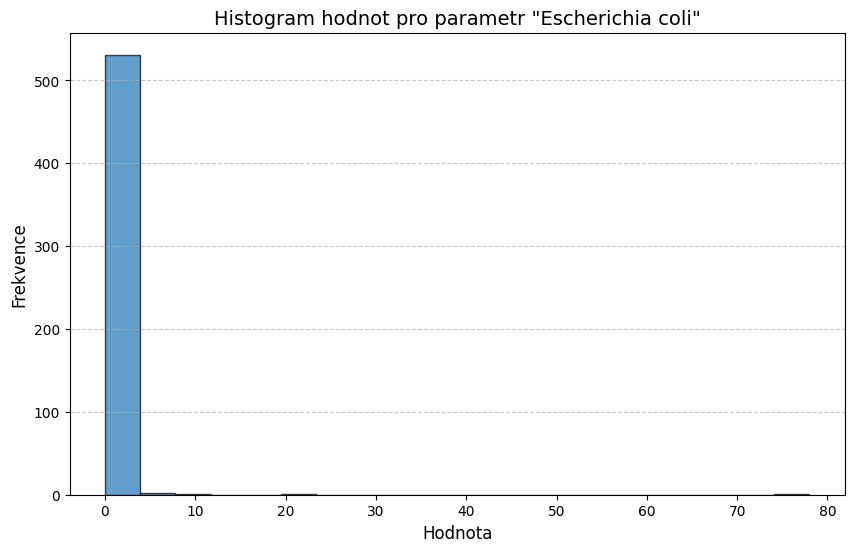

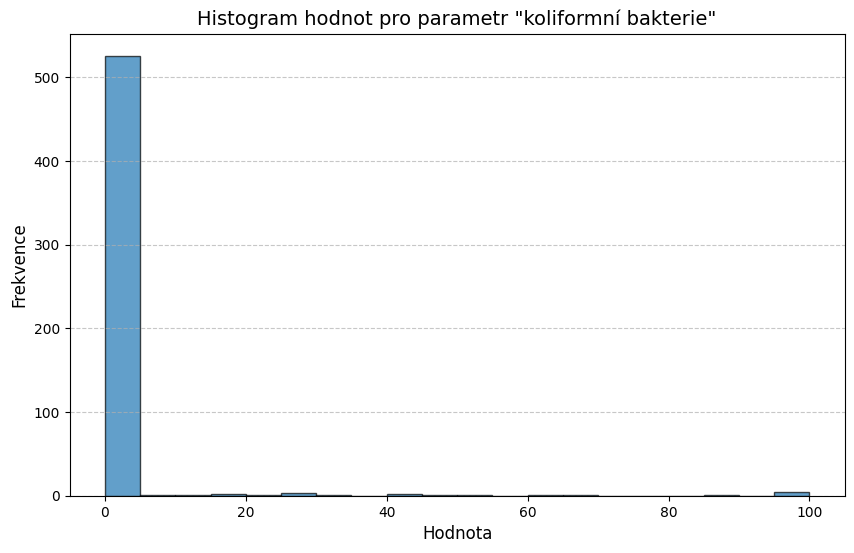

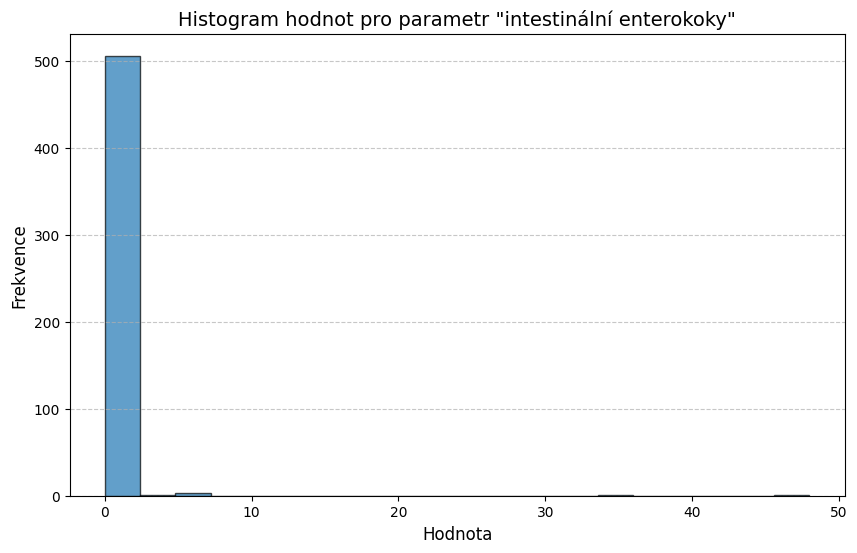

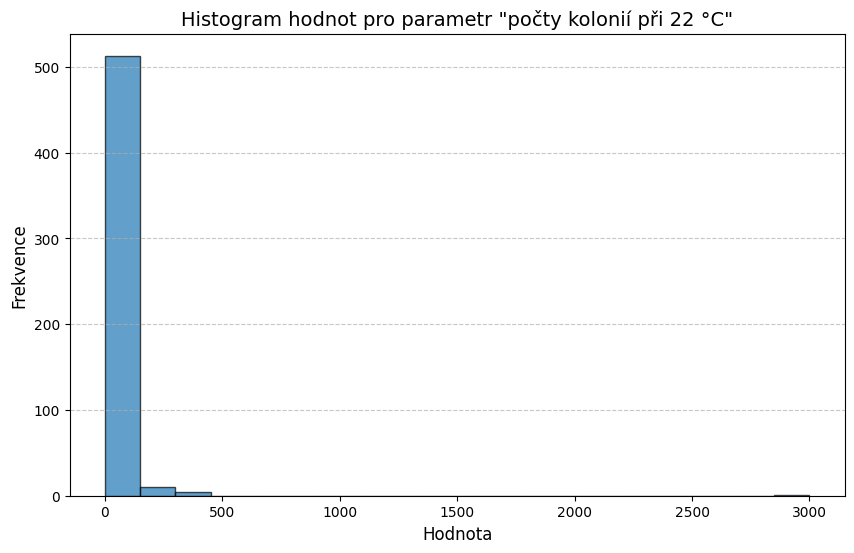

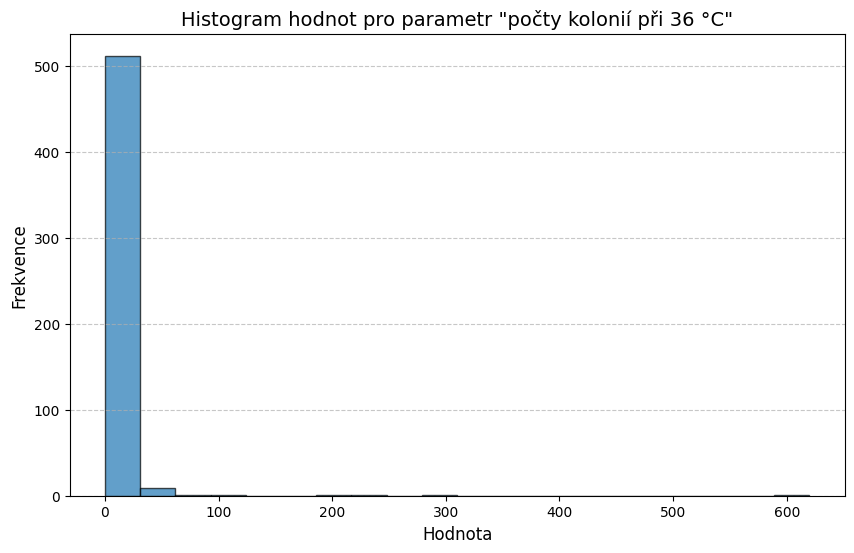

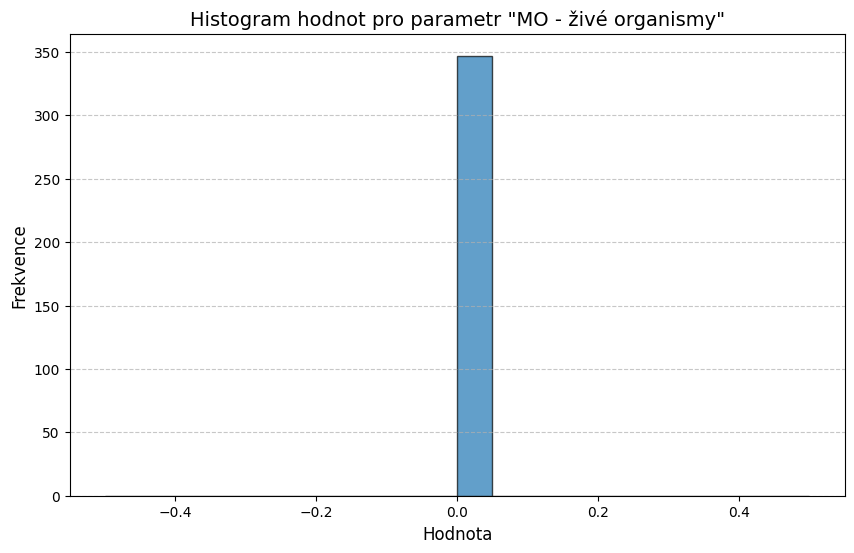

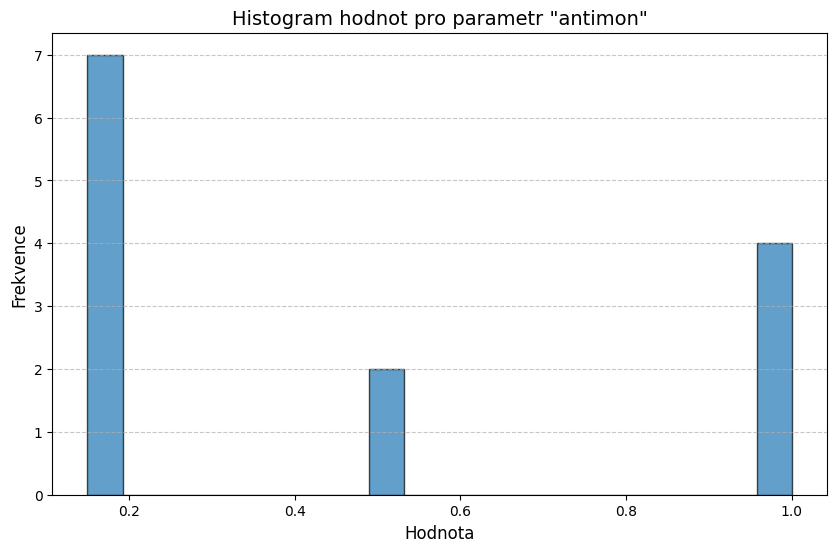

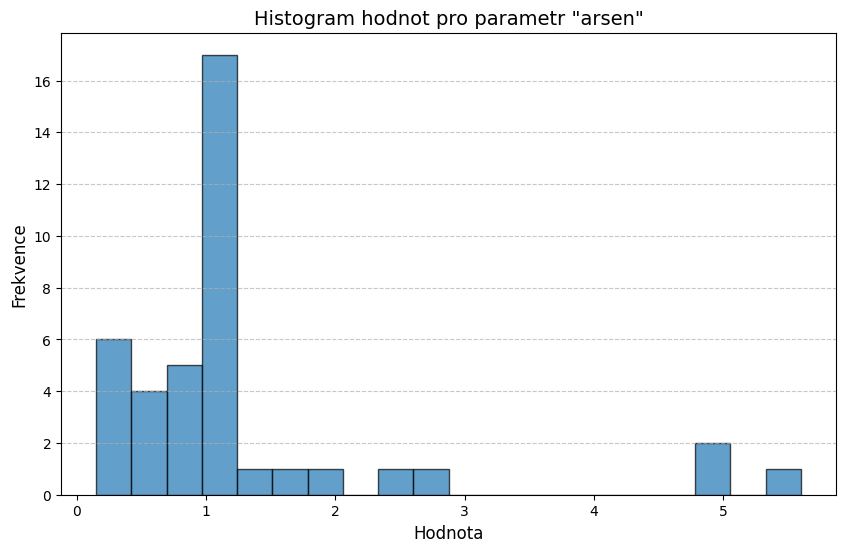

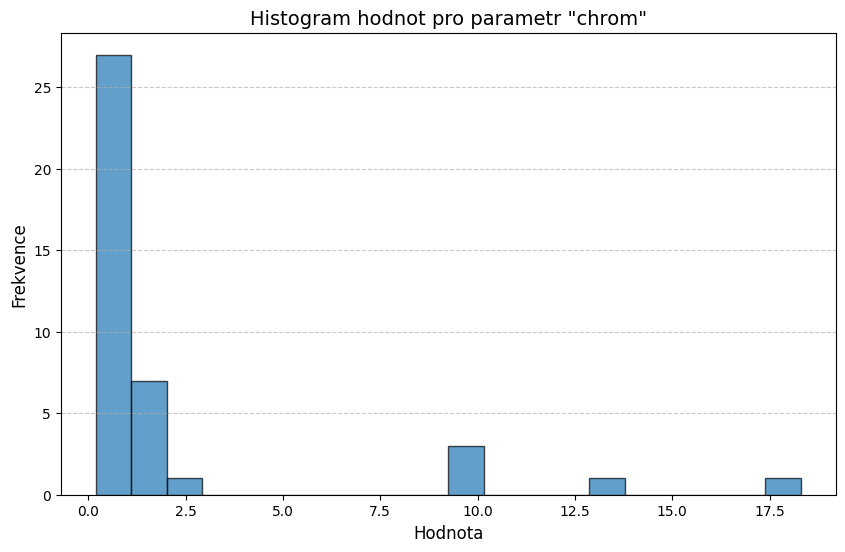

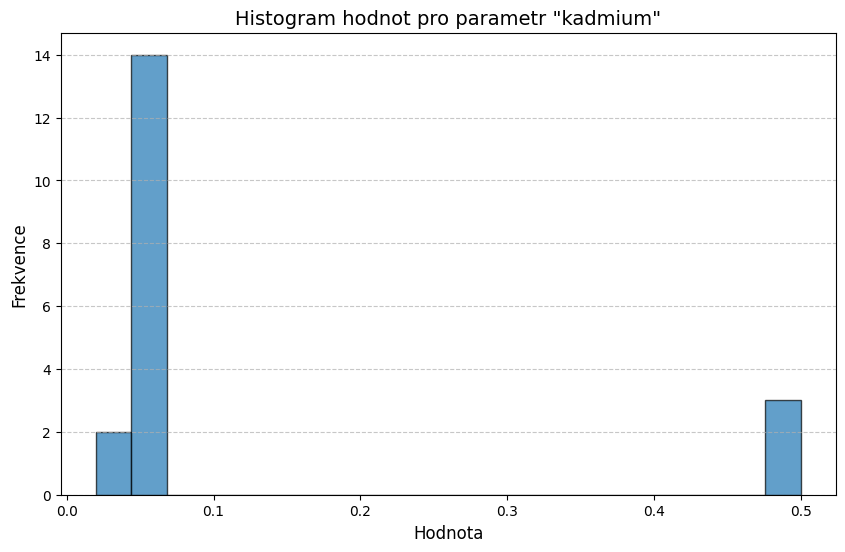

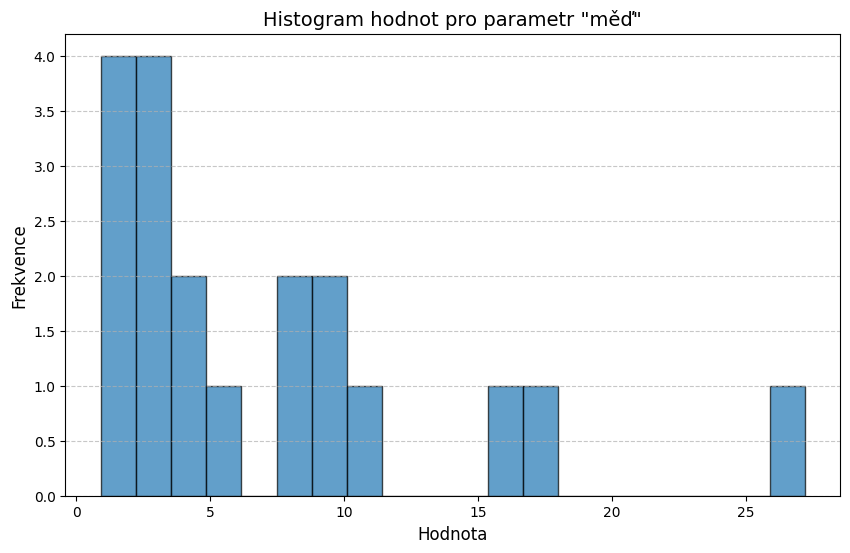

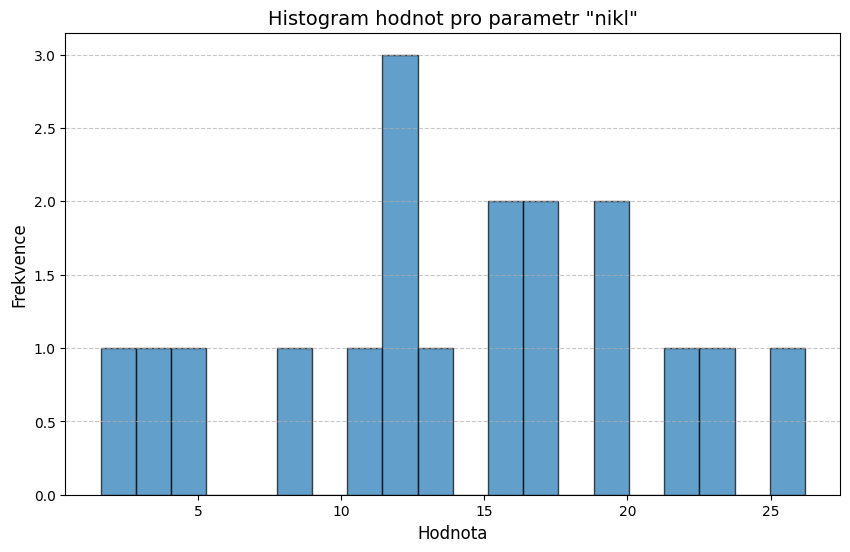

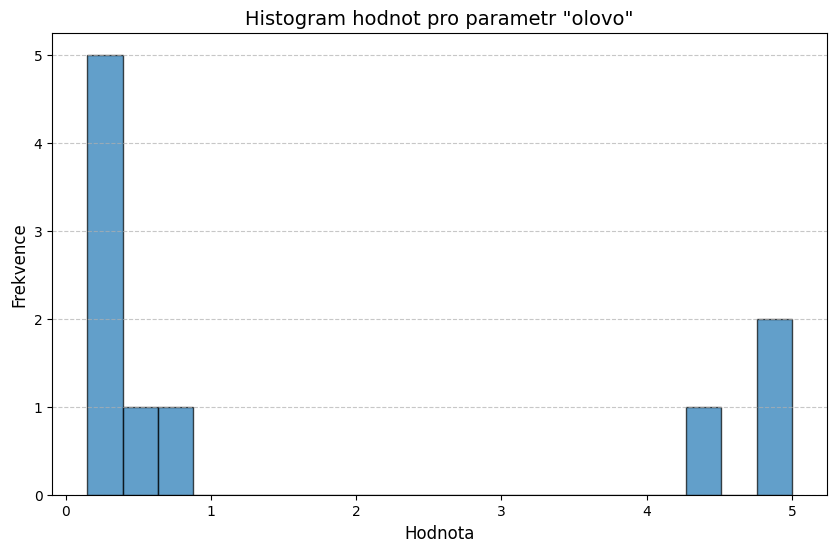

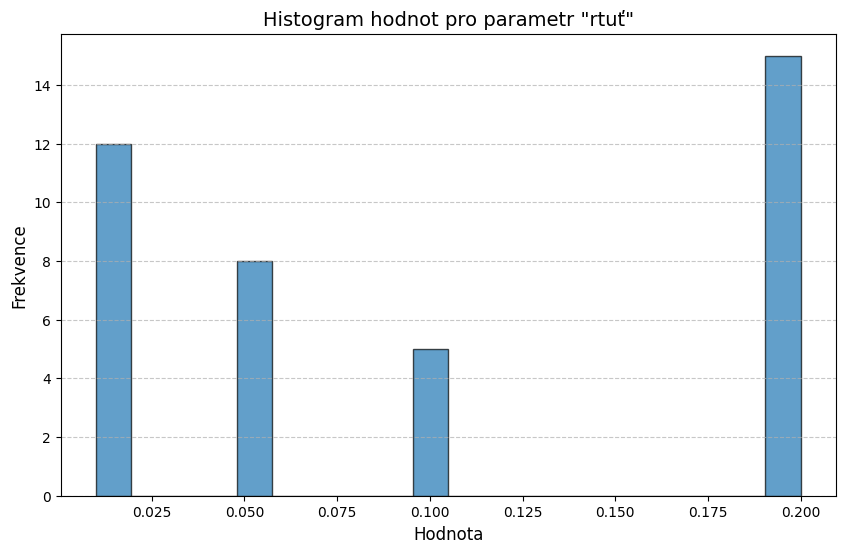

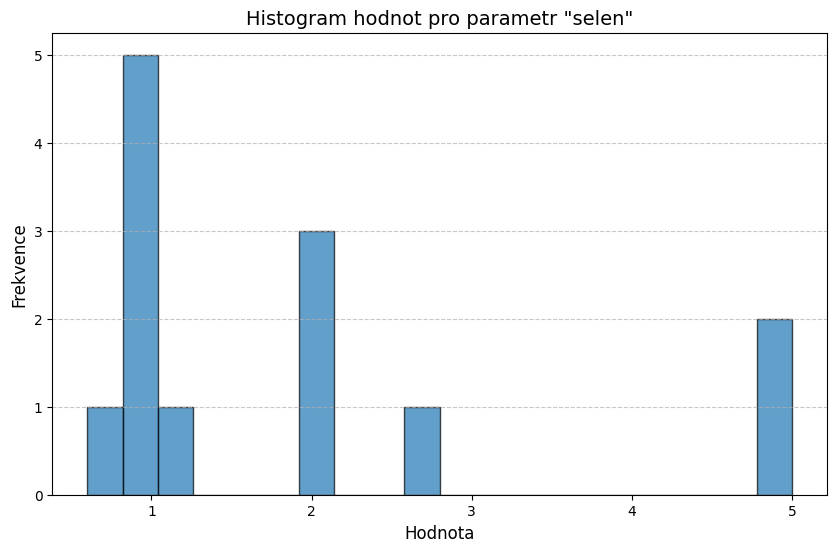

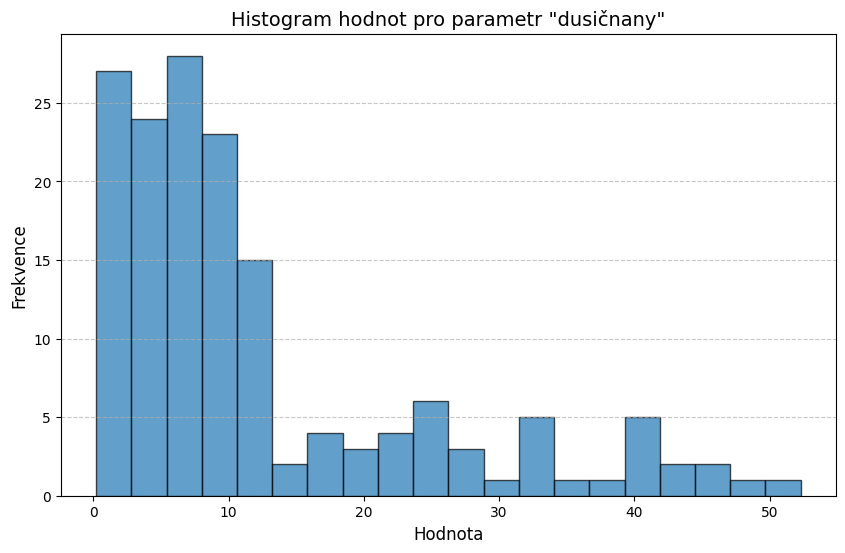

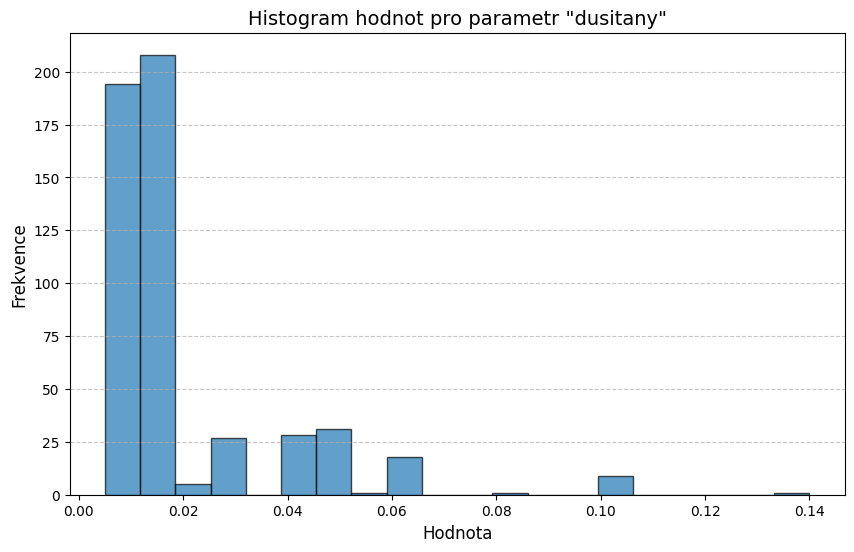

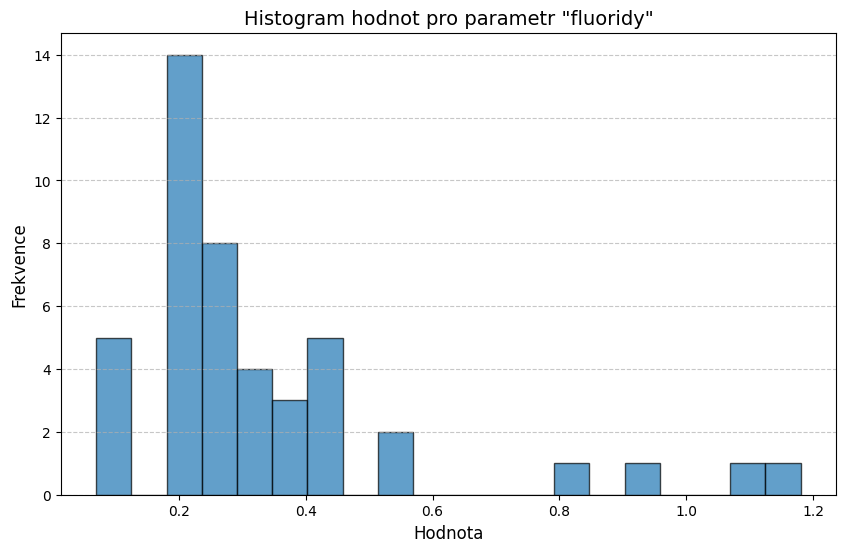

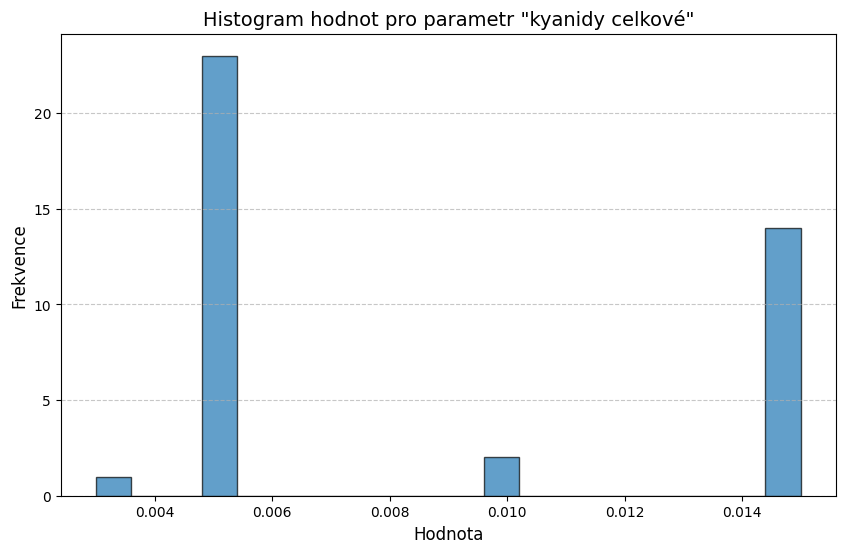

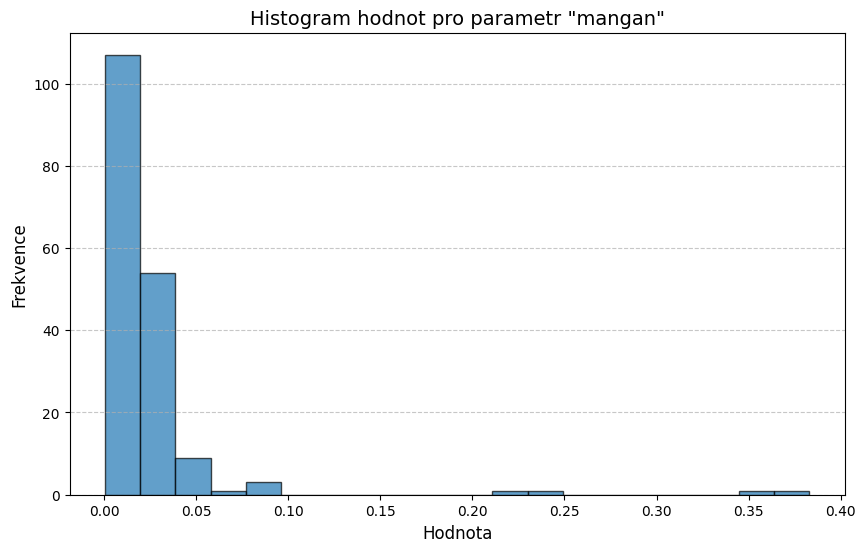

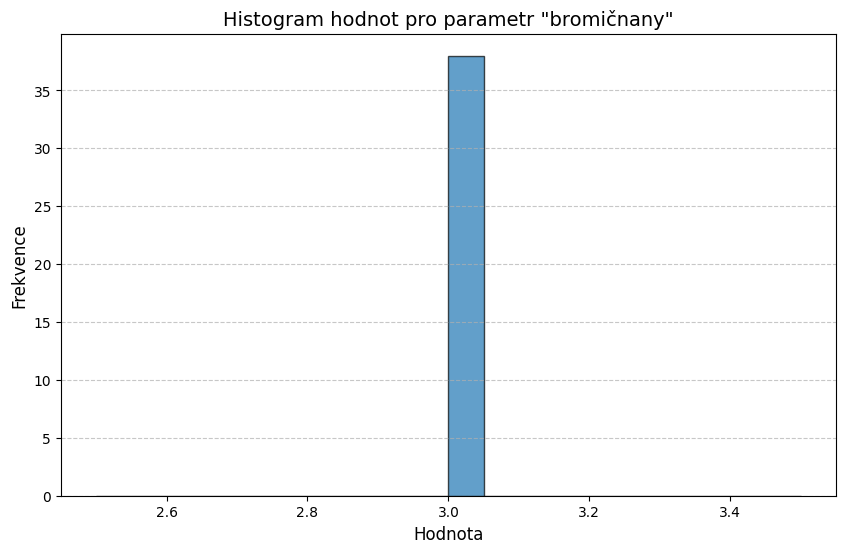

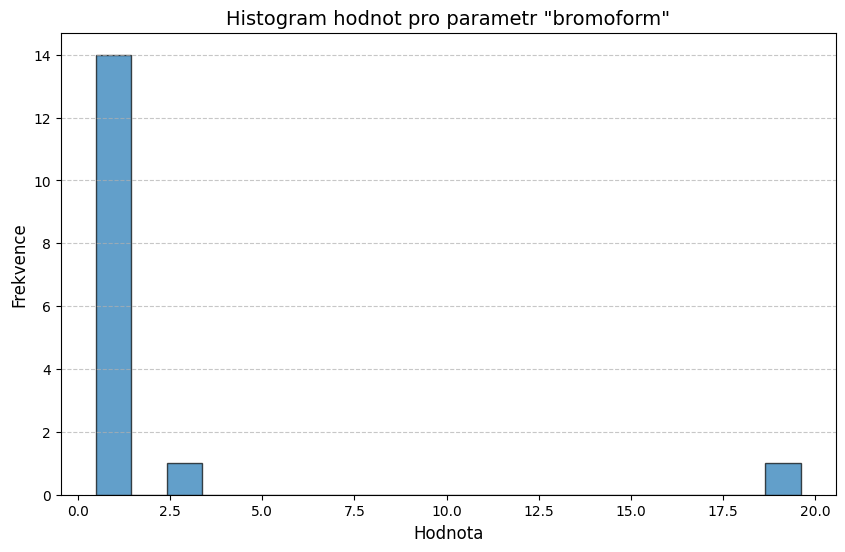

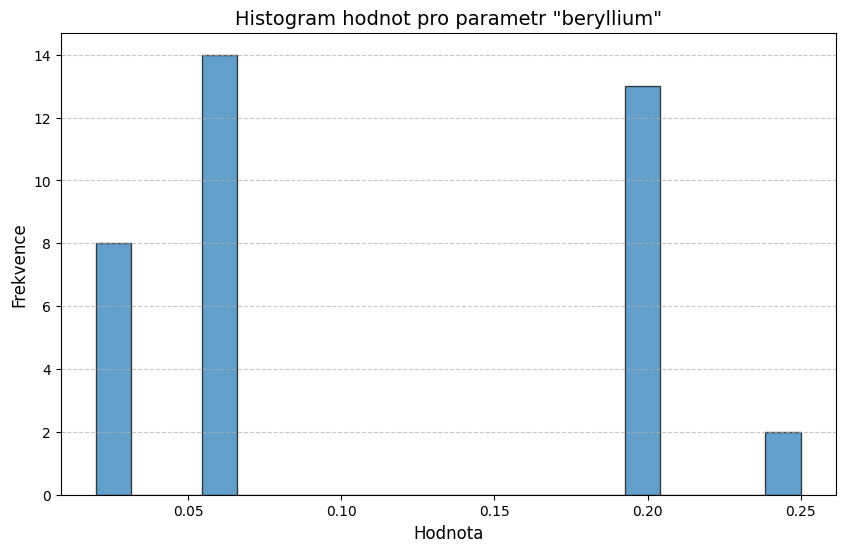

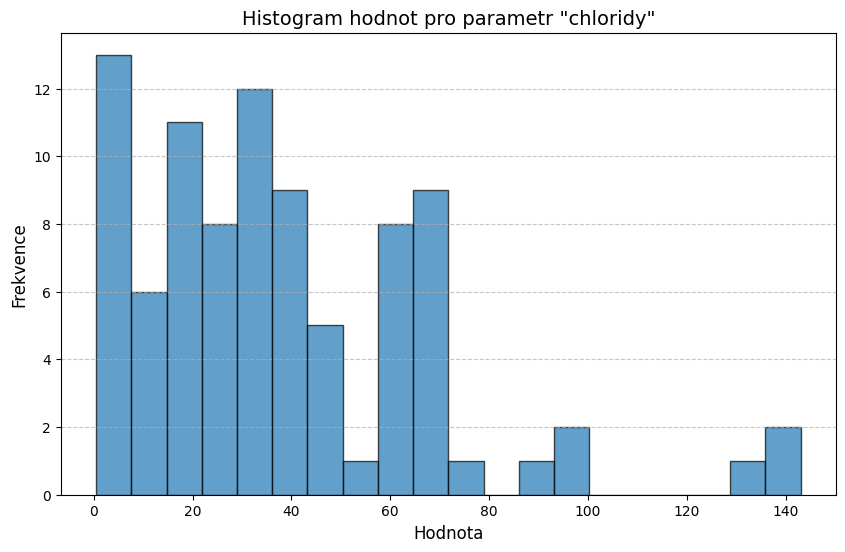

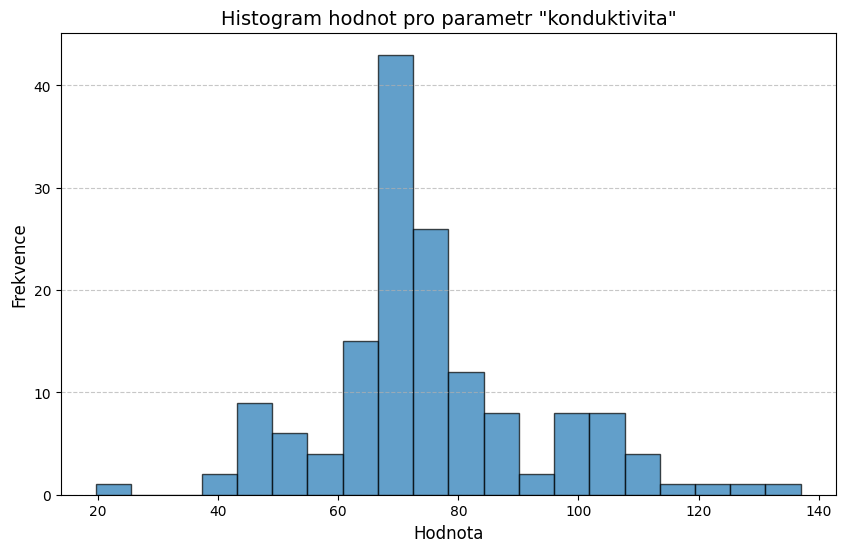

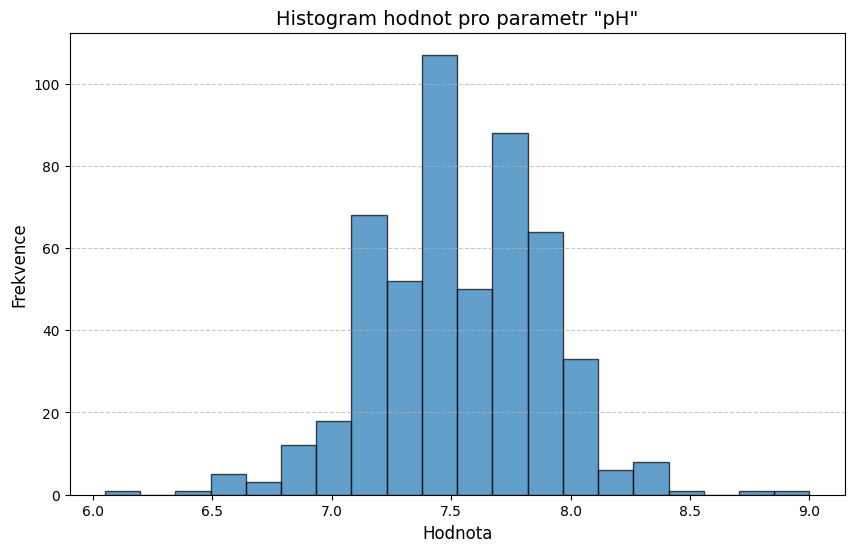

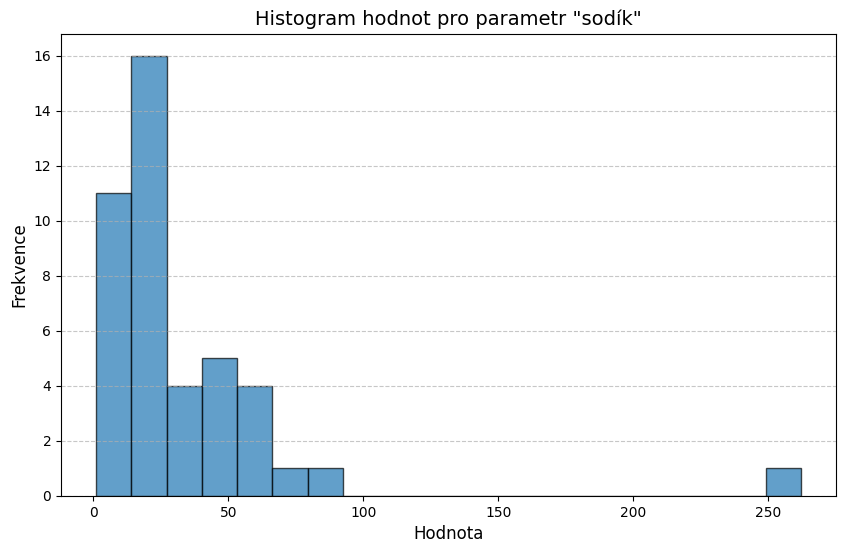

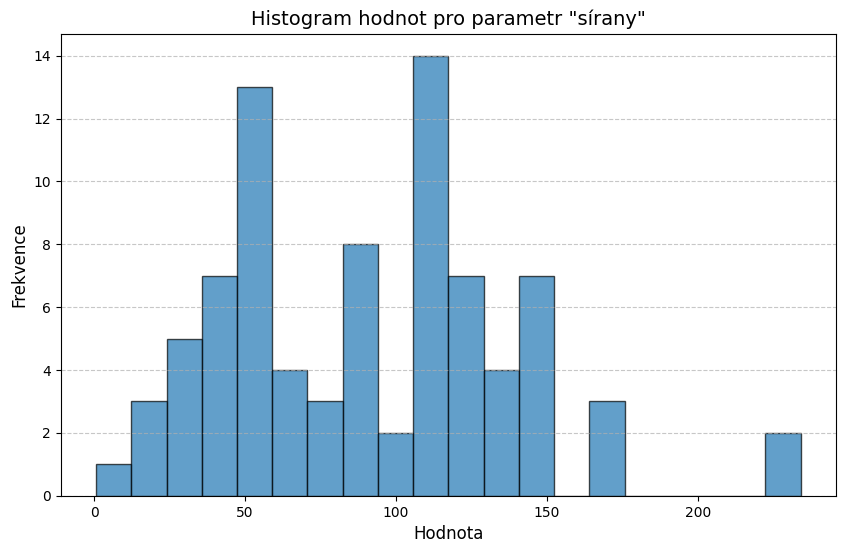

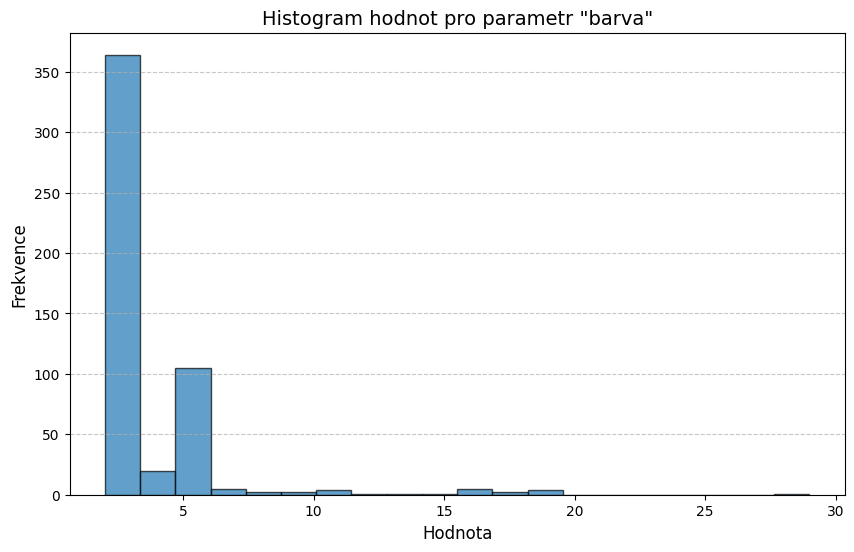

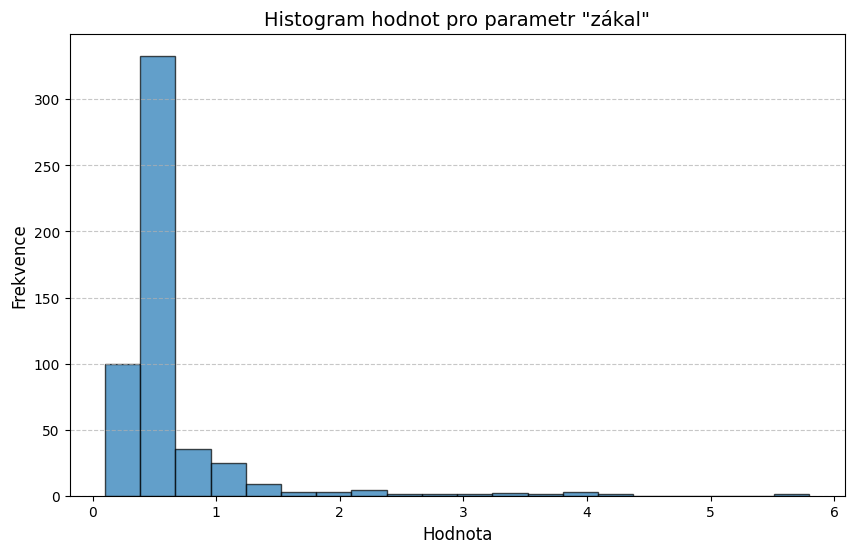

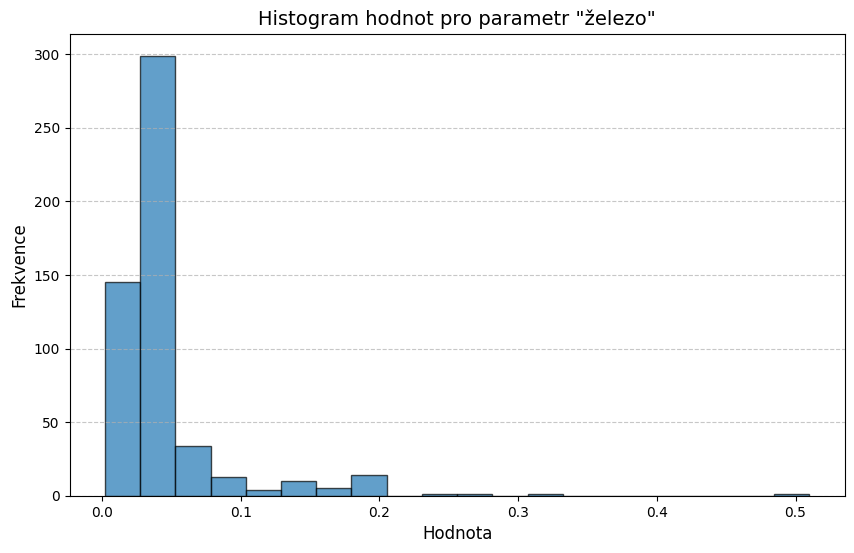

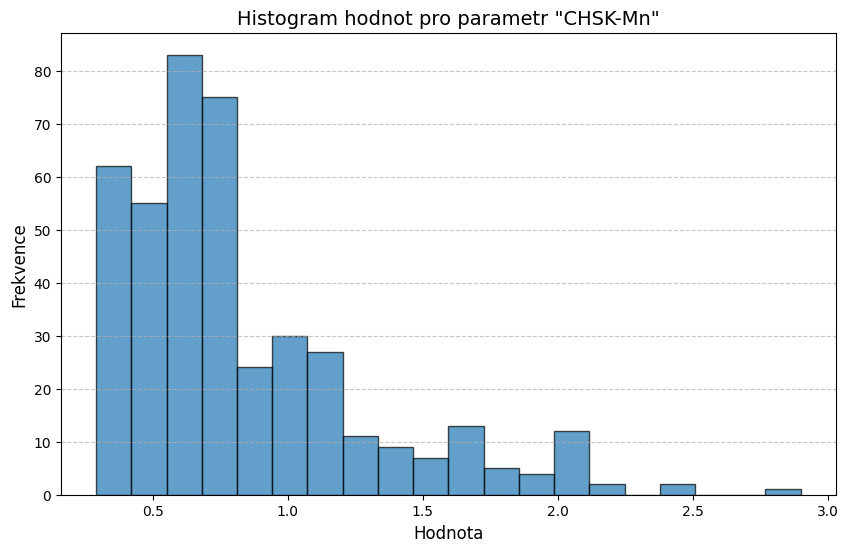

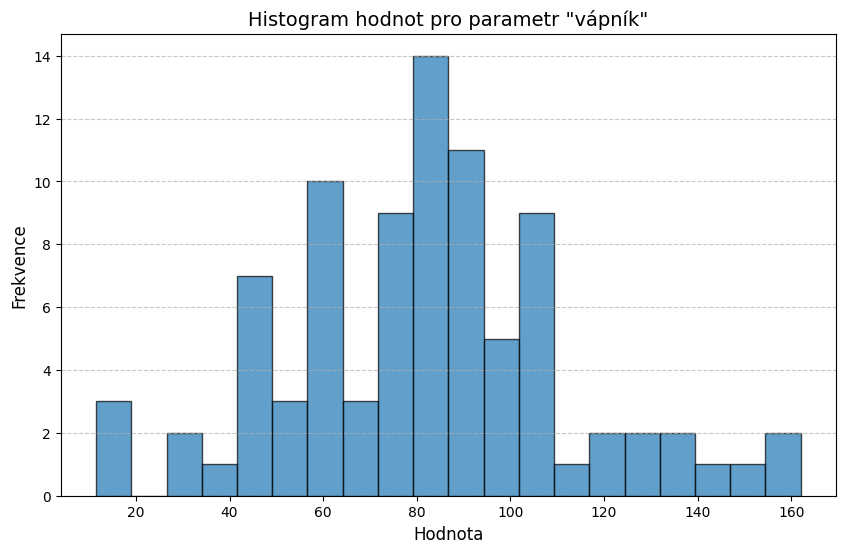

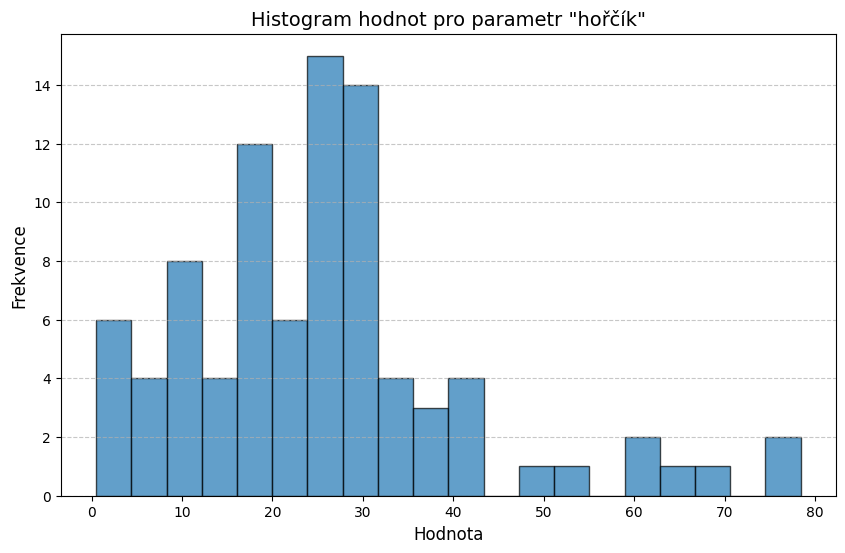

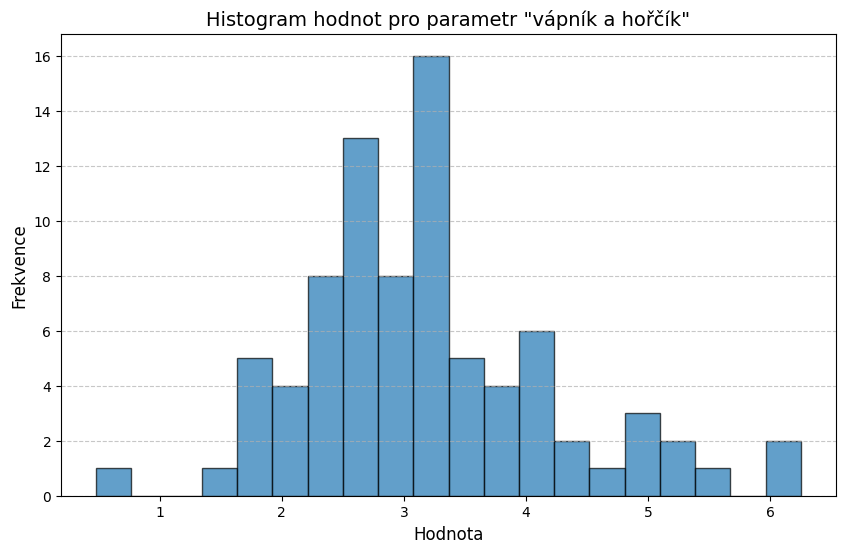

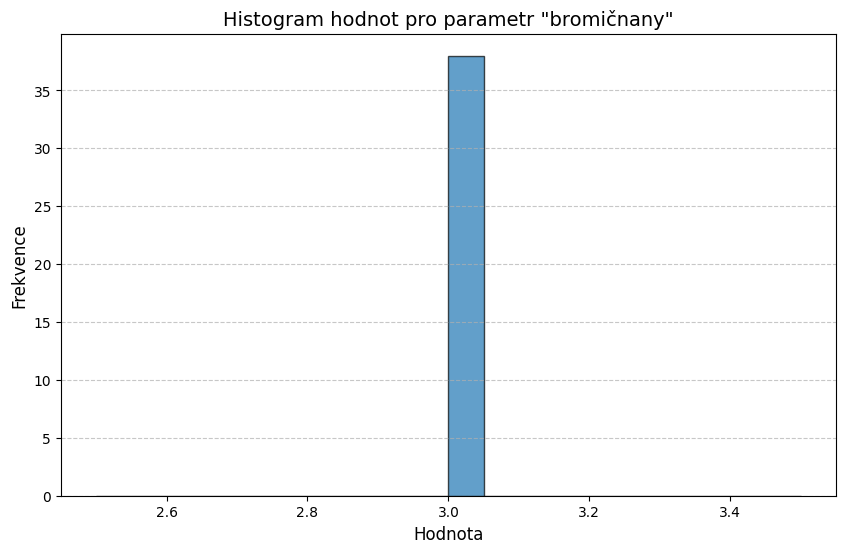

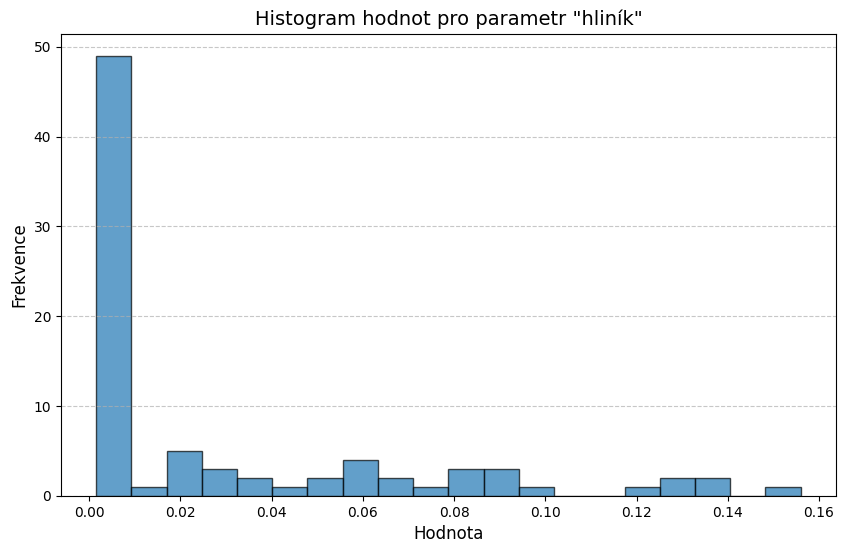

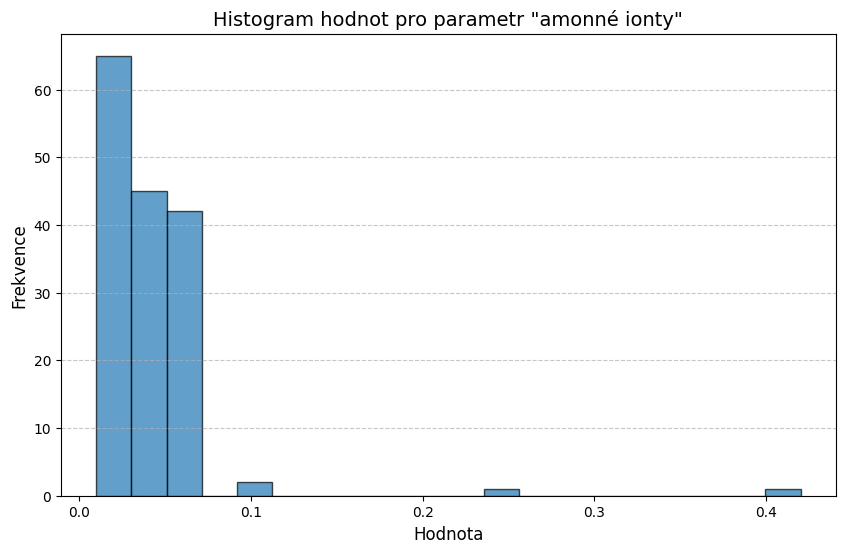

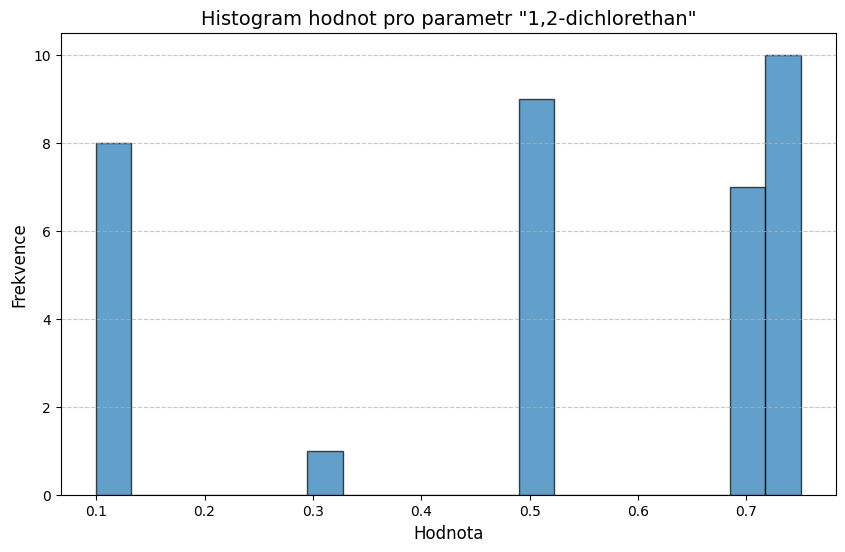

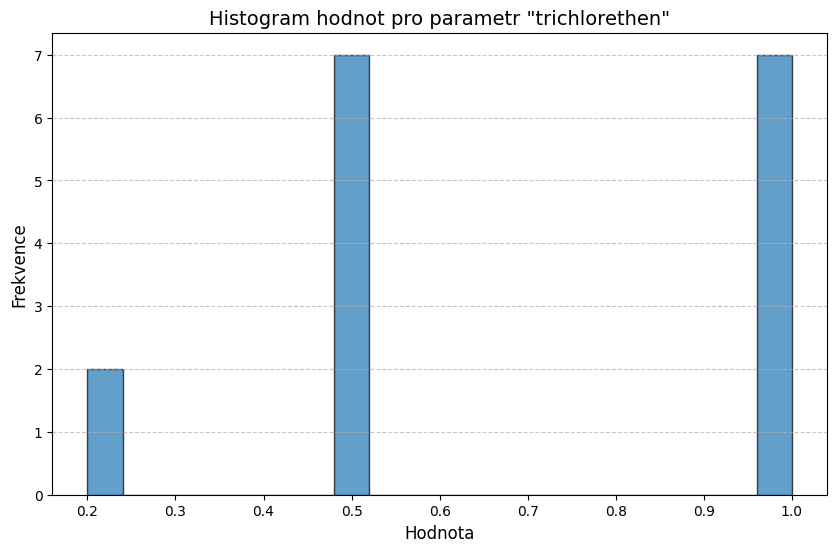

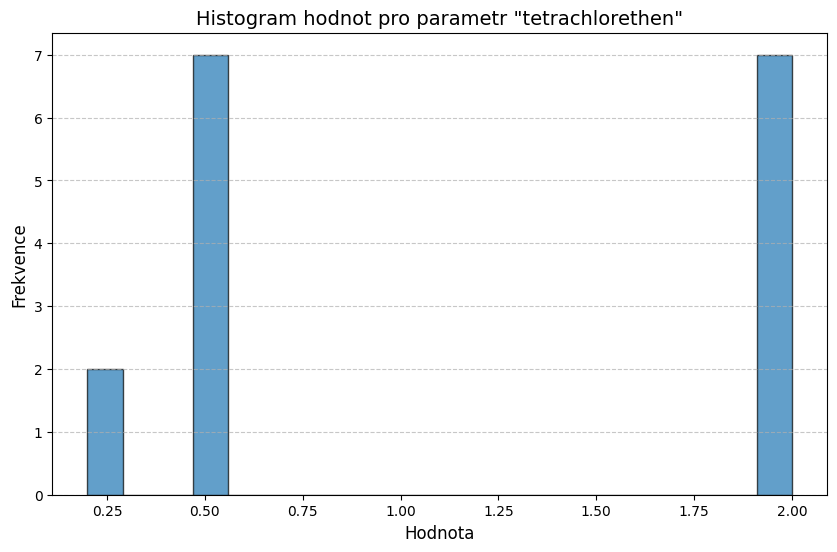

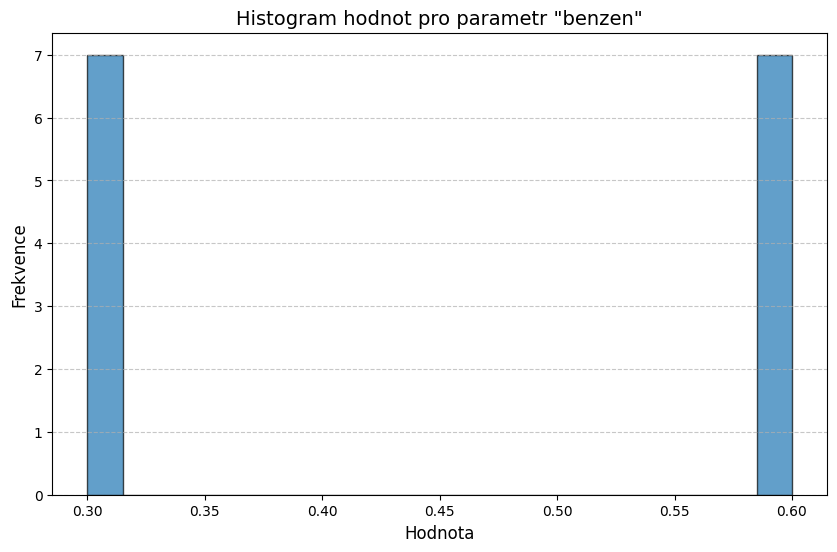

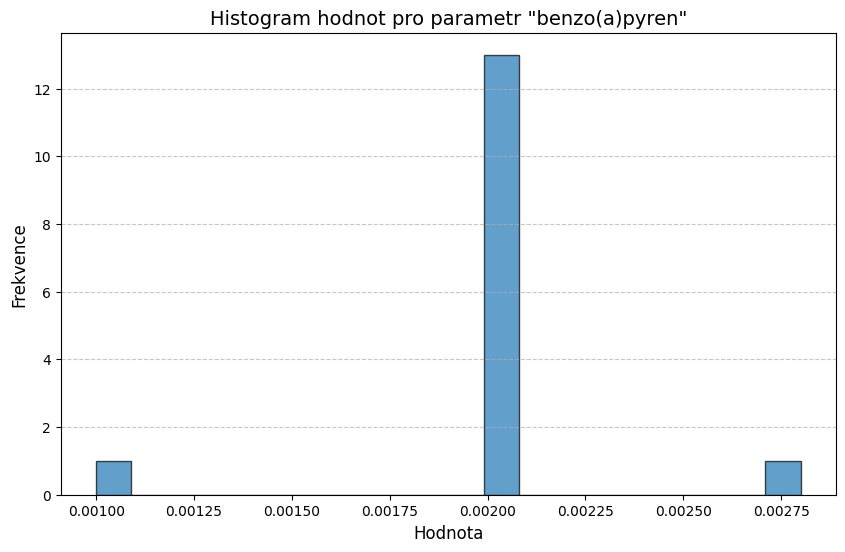

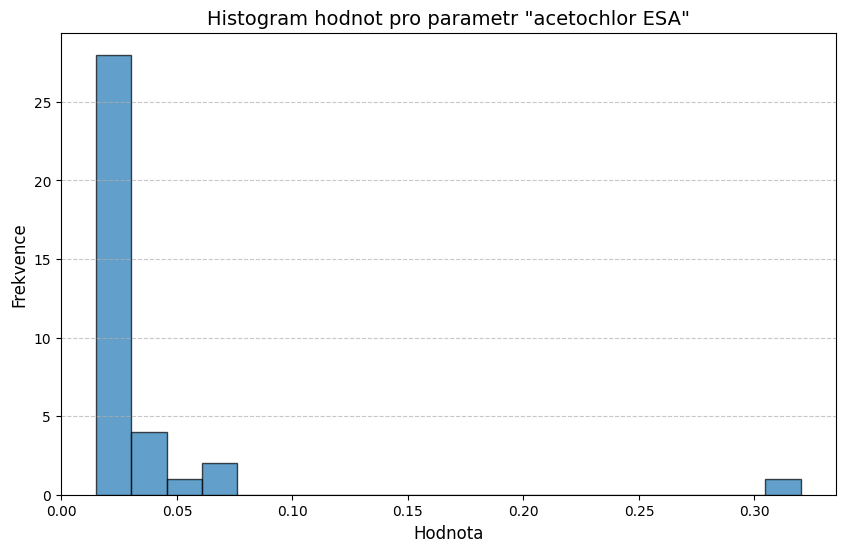

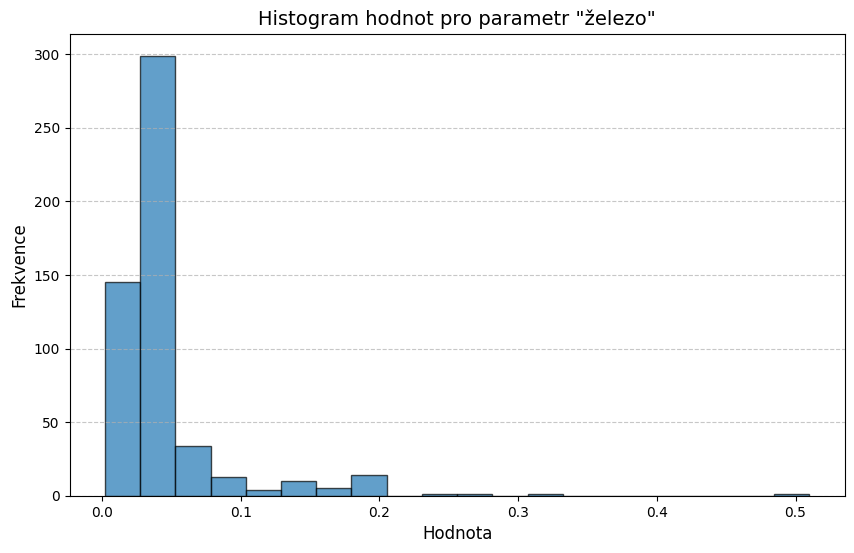

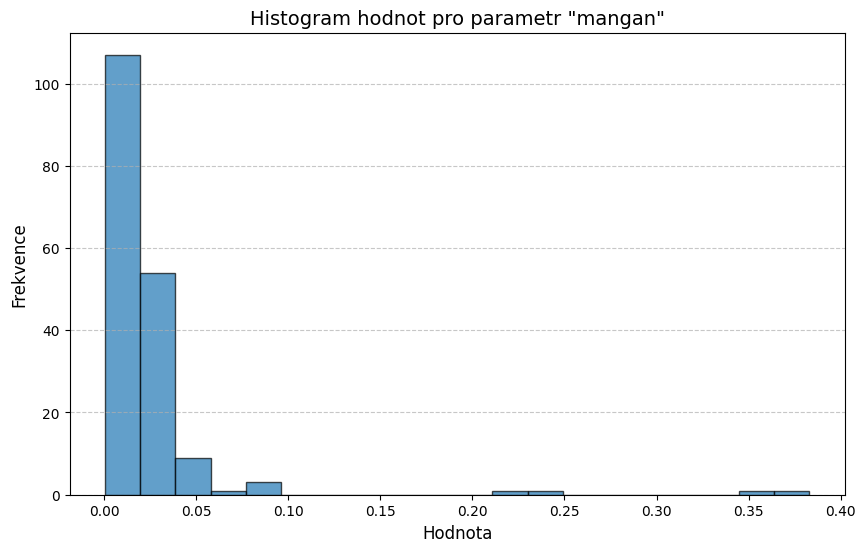

In [3]:
# Loop through each parameter and create histograms for available data
for param in parameters:
    param_data = data[data['Parametr'] == param]
    if not param_data.empty:  # Only create histogram if data is available
        plt.figure(figsize=(10, 6))
        plt.hist(param_data['Hodnota'], bins=20, edgecolor='black', alpha=0.7)
        plt.title(f'Histogram hodnot pro parametr "{param}"', fontsize=14)
        plt.xlabel('Hodnota', fontsize=12)
        plt.ylabel('Frekvence', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()